<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/mimic_veda_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
dfp = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/patients.csv.gz')
dfp

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299772,19999828,F,46,2147,2017 - 2019,NaN
299773,19999829,F,28,2186,2008 - 2010,NaN
299774,19999840,M,58,2164,2008 - 2010,2164-09-17
299775,19999914,F,49,2158,2017 - 2019,NaN


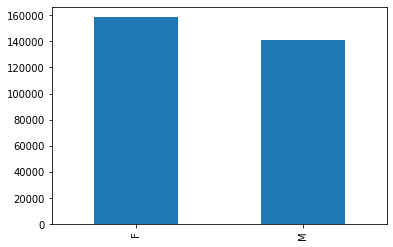

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
dfp['gender'].value_counts().plot(kind='bar')

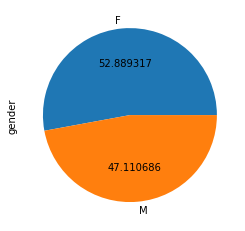

In [3]:
dfp['gender'].value_counts().plot(kind='pie', autopct='%1f')

(array([55462., 35872., 27628., 29625., 30727., 31342., 31959., 21653.,
        17640., 17869.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

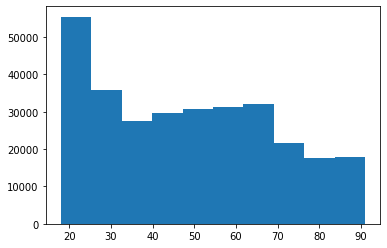

In [4]:
# approx age distribution of patients
plt.hist(dfp['anchor_age'])

(array([ 220.,  351.,  457., 1077., 2016., 3054., 4580., 4500., 5226.,
        7607.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

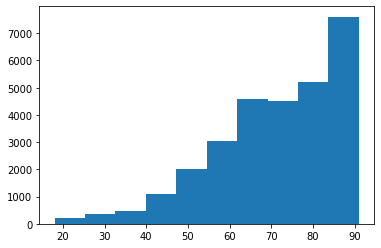

In [5]:
# approx age distribution of dead patients
plt.hist(dfp[dfp['dod'].notnull()]['anchor_age'])

In [6]:
dfa = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/admissions.csv.gz')
dfa.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [7]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431088 entries, 0 to 431087
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            431088 non-null  int64 
 1   hadm_id               431088 non-null  int64 
 2   admittime             431088 non-null  object
 3   dischtime             431088 non-null  object
 4   deathtime             8625 non-null    object
 5   admission_type        431088 non-null  object
 6   admission_location    431088 non-null  object
 7   discharge_location    311774 non-null  object
 8   insurance             431088 non-null  object
 9   language              431088 non-null  object
 10  marital_status        421868 non-null  object
 11  race                  431088 non-null  object
 12  edregtime             299260 non-null  object
 13  edouttime             299260 non-null  object
 14  hospital_expire_flag  431088 non-null  int64 
dtypes: int64(3), obje

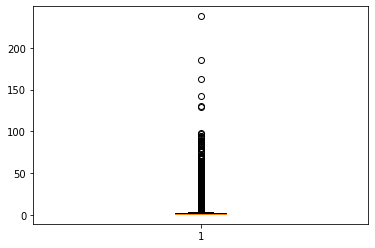

In [8]:
# no missing data in the main columns
# distribution for admissions per patients
import matplotlib.pyplot as plt
plt.boxplot(dfa.groupby('subject_id')['hadm_id'].size());

In [9]:
#race distribution as pie, ignoring less than 1% (~1800)
import numpy as np
df_sub_race = dfa[['subject_id','race']].drop_duplicates(subset=['subject_id'])

In [10]:
# Combine races
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(WHITE.*)','WHITE', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(BLACK.*)','BLACK', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(ASIAN.*)','ASIAN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(HISPANIC.*)','HISPANIC/LATINO', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('UNABLE TO OBTAIN','UNKNOWN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('PATIENT DECLINED TO ANSWER','UNKNOWN', regex=True)
df_simplified_race = df_sub_race['race'].value_counts().reset_index()
df_simplified_race.columns = ['race', 'counts']
df_simplified_race

,race,counts
0,WHITE,120808
1,BLACK,23459
2,UNKNOWN,10113
3,HISPANIC/LATINO,9761
4,ASIAN,7552
5,OTHER,7464
6,PORTUGUESE,500
7,AMERICAN INDIAN/ALASKA NATIVE,387
8,MULTIPLE RACE/ETHNICITY,252
9,SOUTH AMERICAN,240


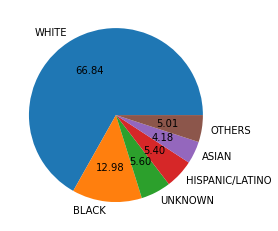

In [11]:
pd.options.mode.chained_assignment = None
if df_simplified_race['race'].str.contains('OTHERS').any()==False:
  df_simplified_race.iloc[5] = df_simplified_race.iloc[5:].sum()
  df_simplified_race['race'][5] = 'OTHERS'

plt.pie(df_simplified_race['counts'][:6], labels=df_simplified_race['race'][:6], autopct='%.2f');

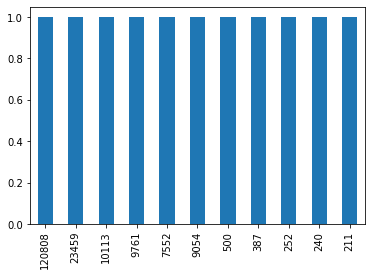

In [12]:
df_simplified_race['counts'].value_counts().plot(kind='bar')

In [13]:
#calculate length of stay per admission in hours
dfa['los'] = (pd.to_datetime(dfa['dischtime'])-pd.to_datetime(dfa['admittime']))/pd.Timedelta(hours=1)

In [14]:
#The mean length of stay
dfa['los'].mean()

107.51788467010601

In [15]:
df_merged = pd.merge(dfp[['subject_id','gender','anchor_age']], dfa[['subject_id','hadm_id','los','admission_type','insurance','marital_status','race','hospital_expire_flag']], on='subject_id', how='inner')
df_merged

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,10000032,F,52,22595853,18.866667,URGENT,Other,WIDOWED,WHITE,0
1,10000032,F,52,22841357,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,10000032,F,52,25742920,42.100000,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,10000032,F,52,29079034,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,10000068,F,19,25022803,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...,...,...
431083,19999828,F,46,25744818,240.266667,EW EMER.,Other,SINGLE,WHITE,0
431084,19999828,F,46,29734428,409.783333,EW EMER.,Other,SINGLE,WHITE,0
431085,19999840,M,58,21033226,167.916667,EW EMER.,Other,WIDOWED,WHITE,1
431086,19999840,M,58,26071774,83.800000,EW EMER.,Other,WIDOWED,WHITE,0


In [16]:
#predicting length of stay using regression model

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431088 entries, 0 to 431087
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            431088 non-null  int64  
 1   gender                431088 non-null  object 
 2   anchor_age            431088 non-null  int64  
 3   hadm_id               431088 non-null  int64  
 4   los                   431088 non-null  float64
 5   admission_type        431088 non-null  object 
 6   insurance             431088 non-null  object 
 7   marital_status        421868 non-null  object 
 8   race                  431088 non-null  object 
 9   hospital_expire_flag  431088 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 36.2+ MB


In [18]:
#checking for null values
df_merged.isnull().sum()

subject_id                 0
gender                     0
anchor_age                 0
hadm_id                    0
los                        0
admission_type             0
insurance                  0
marital_status          9220
race                       0
hospital_expire_flag       0
dtype: int64

In [19]:
#Replacing the null values
#performing Before fill

#replaces null values with unknown for marital_status
df_merged["marital_status"].fillna("Unknown", inplace = True)
print(df_merged)

#checking for null values after replacement
df_merged.isnull().sum()

        subject_id gender  anchor_age   hadm_id         los  admission_type  \
0         10000032      F          52  22595853   18.866667          URGENT   
1         10000032      F          52  22841357   24.366667        EW EMER.   
2         10000032      F          52  25742920   42.100000        EW EMER.   
3         10000032      F          52  29079034   53.333333        EW EMER.   
4         10000068      F          19  25022803    7.166667  EU OBSERVATION   
...            ...    ...         ...       ...         ...             ...   
431083    19999828      F          46  25744818  240.266667        EW EMER.   
431084    19999828      F          46  29734428  409.783333        EW EMER.   
431085    19999840      M          58  21033226  167.916667        EW EMER.   
431086    19999840      M          58  26071774   83.800000        EW EMER.   
431087    19999987      F          57  23865745  207.316667        EW EMER.   

       insurance marital_status     race  hospital_

subject_id              0
gender                  0
anchor_age              0
hadm_id                 0
los                     0
admission_type          0
insurance               0
marital_status          0
race                    0
hospital_expire_flag    0
dtype: int64

In [20]:

# convert to numerical
df_merged = df_merged.astype('category')
wd_column = df_merged.select_dtypes(['category']).columns
df_merged[wd_column] = df_merged[wd_column].apply(lambda x: x.cat.codes)
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431088 entries, 0 to 431087
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   subject_id            431088 non-null  int32
 1   gender                431088 non-null  int8 
 2   anchor_age            431088 non-null  int8 
 3   hadm_id               431088 non-null  int32
 4   los                   431088 non-null  int32
 5   admission_type        431088 non-null  int8 
 6   insurance             431088 non-null  int8 
 7   marital_status        431088 non-null  int8 
 8   race                  431088 non-null  int8 
 9   hospital_expire_flag  431088 non-null  int8 
dtypes: int32(3), int8(7)
memory usage: 11.1 MB
None


In [21]:
df_merged

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,0,0,34,112030,1247,8,2,4,28,0
1,0,0,34,122494,1577,5,0,4,28,0
2,0,0,34,247394,2641,5,0,4,28,0
3,0,0,34,391278,3315,5,0,4,28,0
4,1,0,1,216394,545,4,2,2,28,0
...,...,...,...,...,...,...,...,...,...,...
431083,180744,0,28,247484,14487,5,2,2,28,0
431084,180744,0,28,419686,22997,5,2,2,28,0
431085,180745,1,40,44563,10189,5,2,4,28,1
431086,180745,1,40,261389,5143,5,2,4,28,0


In [22]:
df1 = df_merged.drop(['subject_id'], axis = 1)

In [23]:
df = df1.drop(['hadm_id'], axis = 1)
df.head()

,gender,anchor_age,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,0,34,1247,8,2,4,28,0
1,0,34,1577,5,0,4,28,0
2,0,34,2641,5,0,4,28,0
3,0,34,3315,5,0,4,28,0
4,0,1,545,4,2,2,28,0


In [38]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
df['anchor_age']=Scaler.fit_transform(df['anchor_age'].values.reshape(-1, 1))
#df['los']=Scaler.fit_transform(df['los'].values.reshape(-1, 1))
df['race']=Scaler.fit_transform(df['race'].values.reshape(-1, 1))
df.head()

,gender,anchor_age,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,0,0.472222,0.035612,8,2,4,0.875,0
1,0,0.472222,0.045037,5,0,4,0.875,0
2,0,0.472222,0.075423,5,0,4,0.875,0
3,0,0.472222,0.094671,5,0,4,0.875,0
4,0,0.013889,0.015564,4,2,2,0.875,0


In [39]:
X = df[['gender','anchor_age','admission_type','insurance','marital_status','race','hospital_expire_flag']]
y = df['los']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(323316, 7)
(323316,)
(107772, 7)
(107772,)


In [41]:
X_train.head()

,gender,anchor_age,admission_type,insurance,marital_status,race,hospital_expire_flag
70875,0,0.708333,4,1,1,0.87500,0
335068,0,0.694444,4,1,0,0.87500,0
368258,0,0.361111,4,2,1,0.87500,0
250865,1,0.541667,6,2,1,0.87500,0
317290,0,0.416667,5,2,2,0.21875,0


In [42]:
y_train.head()

70875     0.012480
335068    0.136937
368258    0.020191
250865    0.128027
317290    0.230209
Name: los, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

lr_expected = y_test
lr_predicted = linReg.predict(X_test)
score = linReg.score(X_test, y_test)
print('Linear Regression =',score)
train_acc = linReg.score(X_train, y_train)
print("The Training Accuracy is {}".format(train_acc*100))

Linear Regression = 0.07519250353735518
The Training Accuracy is 7.453537894015949


In [ ]:
# from sklearn import svm
# #svm regression

# # train the model
# model = svm.SVC(kernel='rbf', random_state = 1)
# model.fit(X_train,y_train)
# score = model.score(X_test, y_test)
# print(score)

In [ ]:
#SVM
# from sklearn.svm import SVC
# model = SVC(kernel='rbf', random_state = 1)
# model.fit(X_train,y_train)
# score = model.score(X_test, y_test)
# print(score)

In [ ]:
y = df['los']
X = df.drop(['los'], axis = 1)


from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

lr_expected = y_test
lr_predicted = logReg.predict(X_test)
lr_y_proba = logReg.predict_proba(X_test)[:,1]
score = logReg.score(X_test, y_test)
print('Logistic Regression =',score)
train_acc = logReg.score(X_train, y_train)
print("The Training Accuracy is {}".format(train_acc*100))